In [1]:
# Colin Crowe
import capstone_utils as cu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv("fork3.csv")
raw2 = pd.read_csv("fork3_intercon.csv")

In [2]:
# helper functions

def print_dict(dictionary):
    for i in dictionary.keys():
        print(str(i) + " | " + str(dictionary[i]))
    return

def get_base_infected(raw, num_nodes):
    '''Returns the total number of times each node got infected'''
    nodes = list(raw)
    nodes = nodes[:num_nodes+1]
    
    base_infected = {}
    
    for i in nodes:
        base_infected[i] = 0
        
    for i in nodes:
        for j in raw[i]:
            if j == 1:
                base_infected[i] += 1
                
    return base_infected

def get_inf_rates(raw, num_nodes, manhole):
    '''Returns the total number of times each node got infected
       given that one of the sewer nodes was samplable'''
    nodes = list(raw)
    nodes = nodes[:num_nodes+1]
    
    stats = {}
    stats['time'] = 0
    for i in nodes:
        stats[i] = 0
        
    for i in range(len(raw[manhole])):
        if raw[manhole][i] == 1:
            stats['time'] += 1
            for j in nodes:
                if raw[j][i] == 1:
                    stats[j] += 1
                    
    return stats

def get_ratio(one, two, tot_one, tot_two):
    ratios = {}
    for i in one.keys():
        ratios[i] = (one[i] / tot_one, two[i] / tot_two)
    return ratios

def make_graph(data, color1, color2, x_label, y_label, title, legend, y_lim=0.6, avg=-1, y_low=0, show_zero=False):
    X = np.arange(29)
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,2])
    ax.bar(X - 0.2, data[0], color = color1, width = 0.4)
    ax.bar(X + 0.2, data[1], color = color2, width = 0.4)
    ax.set_ylabel(y_label, fontsize=10)
    ax.set_xlabel(x_label, fontsize=10)
    plt.legend(legend,loc=1,prop={'size': 14})
    if avg != -1:
        plt.axhline(y=avg, color="grey", linestyle="--", label=str(avg))
        ax.annotate(str(avg)[:6], (-1.5, avg+0.005), color="grey", fontweight='bold')
    if show_zero:
        plt.axhline(y=0, color="black", lw=0.7)
    plt.title(title, fontsize=15)
    plt.ylim([y_low, y_lim])
    plt.xticks(X)
    return

def covariance(X,Y):
    assert len(X) == len(Y), "ERROR: inputs not of the same size"
    cov = 0
    avgX = sum(X)/len(X)
    avgY = sum(Y)/len(Y)
    for i in range(len(X)):
        cov += (X[i] - avgX) * (Y[i] - avgY)
    return cov / (len(X) - 1)

def get_covariances(nodes, manhole, raw):
    covs = []
    manhole = list(raw[manhole])
    for i in nodes:
        lst = list(raw[i])
        for j in range(len(lst)):
            lst[j] = lst[j] % 2
        covs.append(covariance(lst, manhole))
    return covs

In [84]:
base = get_base_infected(raw, 28)
stats = get_inf_rates(raw, 28, '0-1-2')
ratio = get_ratio(base, stats, 50000, stats['time'])
# print_dict(ratio)

In [98]:
base2 = get_base_infected(raw2, 28)
stats2 = get_inf_rates(raw2, 28, '0-1-2')
ratio2 = get_ratio(base2, stats2, 50000, stats2['time'])
# print_dict(ratio2)

In [99]:
one, two, three, four = [], [], [], []
for i in ratio.keys():
    one.append(ratio[i][0])
    two.append(ratio[i][1])
    three.append(ratio2[i][0])
    four.append(ratio2[i][1])

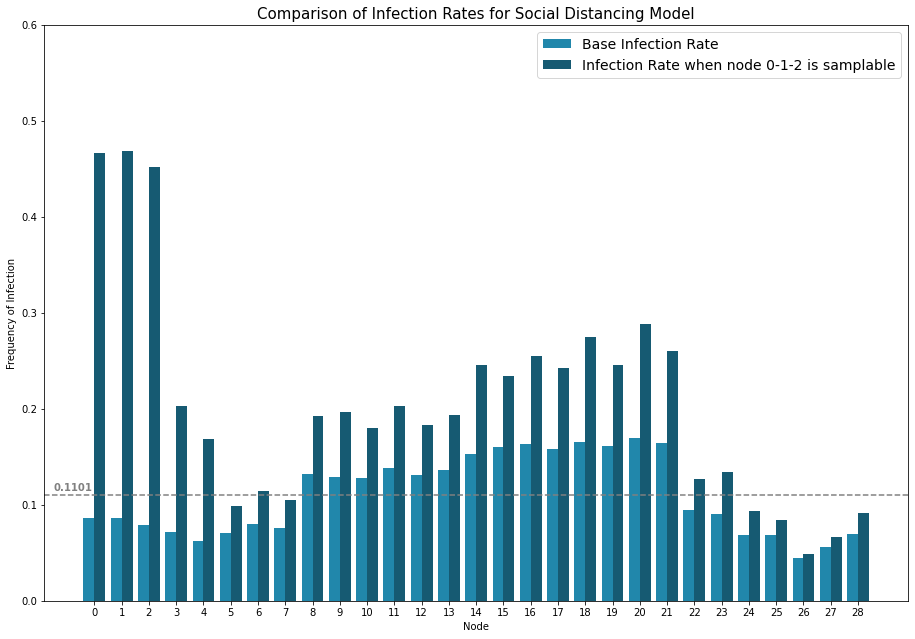

In [87]:
make_graph([one, two], 
           '#2187ab', 
           '#165a72', 
           'Node',
           'Frequency of Infection', 
           'Comparison of Infection Rates for Social Distancing Model',
           ['Base Infection Rate', 'Infection Rate when node 0-1-2 is samplable'],
           avg=sum(one)/len(one))

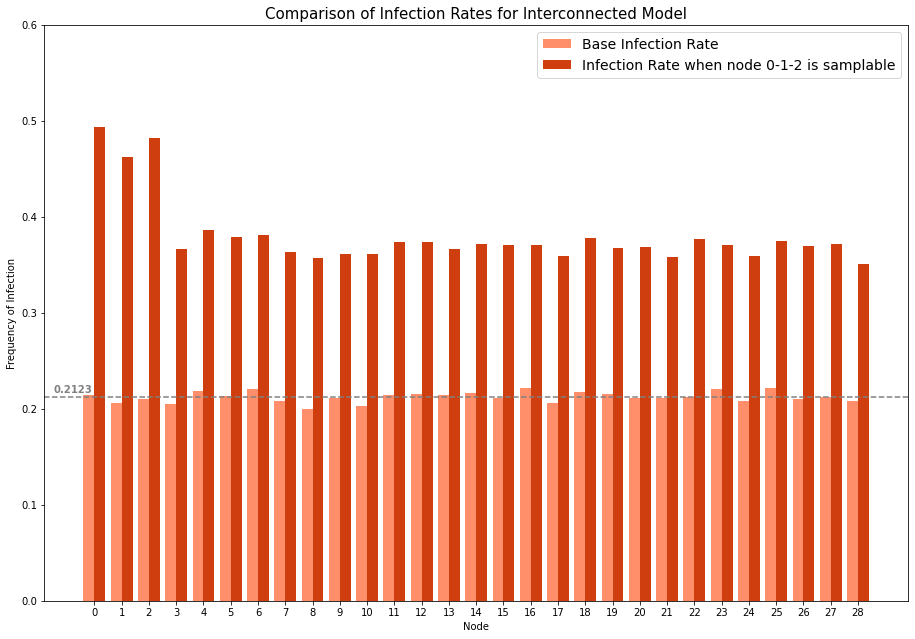

In [133]:
make_graph([three, four], 
           '#ff8f6b',
           '#cf3e0e', 
           'Node',
           'Frequency of Infection', 
           'Comparison of Infection Rates for Interconnected Model',
           ['Base Infection Rate', 'Infection Rate when node 0-1-2 is samplable'],
           avg=sum(three)/len(three))

In [134]:
raw = pd.read_csv("fork3_high_inf.csv")
raw2 = pd.read_csv("fork3_intercon_low_inf.csv")

In [135]:
base = get_base_infected(raw, 28)
stats = get_inf_rates(raw, 28, '0-1-2')
ratio = get_ratio(base, stats, 50000, stats['time'])
base2 = get_base_infected(raw2, 28)
stats2 = get_inf_rates(raw2, 28, '0-1-2')
ratio2 = get_ratio(base2, stats2, 50000, stats2['time'])

In [136]:
one, two, three, four = [], [], [], []
for i in ratio.keys():
    one.append(ratio[i][0])
    two.append(ratio[i][1])
    three.append(ratio2[i][0])
    four.append(ratio2[i][1])

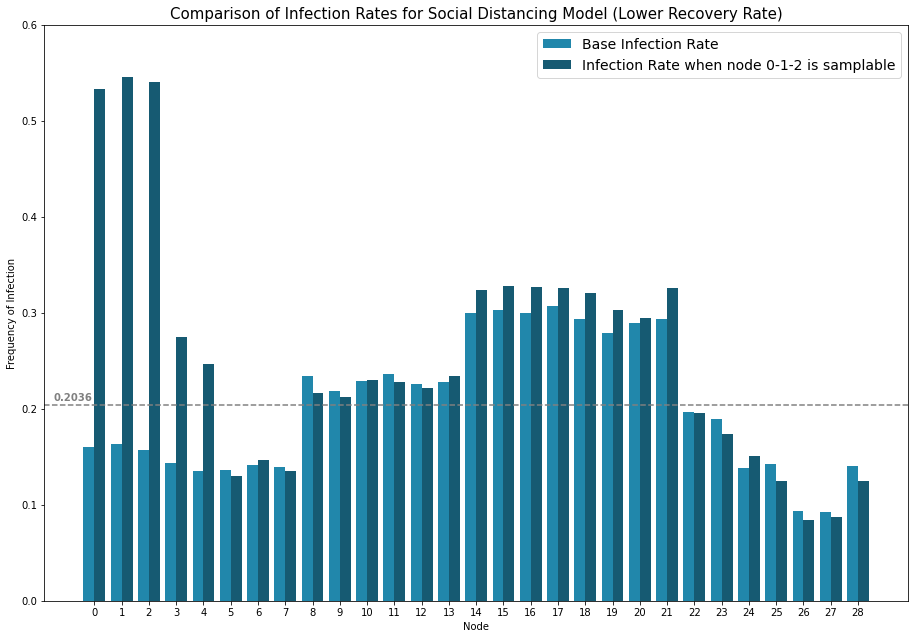

In [137]:
make_graph([one, two], 
           '#2187ab', 
           '#165a72', 
           'Node',
           'Frequency of Infection', 
           'Comparison of Infection Rates for Social Distancing Model (Lower Recovery Rate)',
           ['Base Infection Rate', 'Infection Rate when node 0-1-2 is samplable'],
           y_lim=0.6,
           avg=sum(one)/len(one))

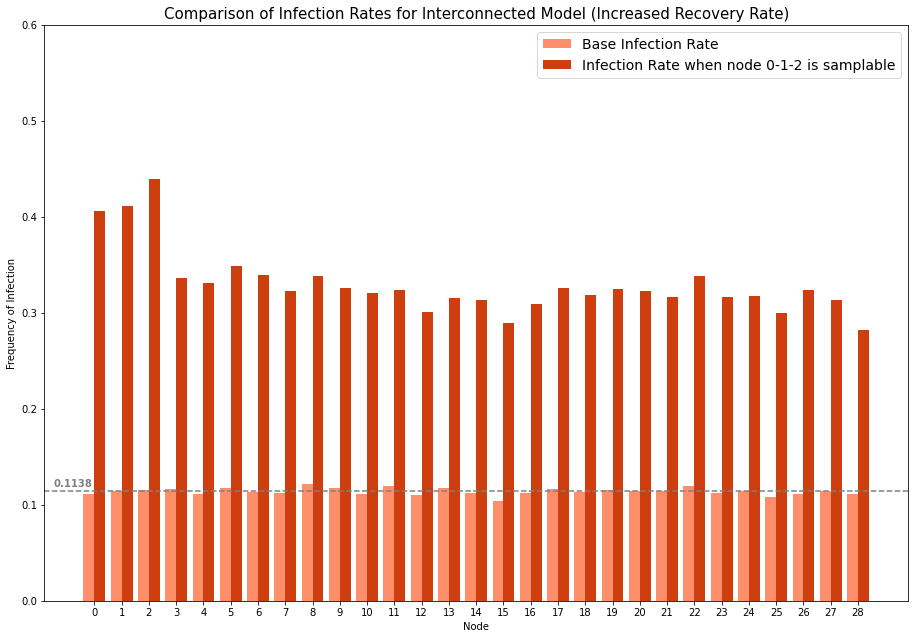

In [138]:
make_graph([three, four], 
           '#ff8f6b',
           '#cf3e0e', 
           'Node',
           'Frequency of Infection', 
           'Comparison of Infection Rates for Interconnected Model (Increased Recovery Rate)',
           ['Base Infection Rate', 'Infection Rate when node 0-1-2 is samplable'],
           avg=sum(three)/len(three))

In [36]:
raw = pd.read_csv("fork3_high_inf.csv")
raw2 = pd.read_csv("fork3_intercon.csv")

In [37]:
nodes = list(raw)
nodes = nodes[:29]
covs1 = get_covariances(nodes, '0-1-2', raw)
covs2 = get_covariances(nodes, '0-1-2', raw2)

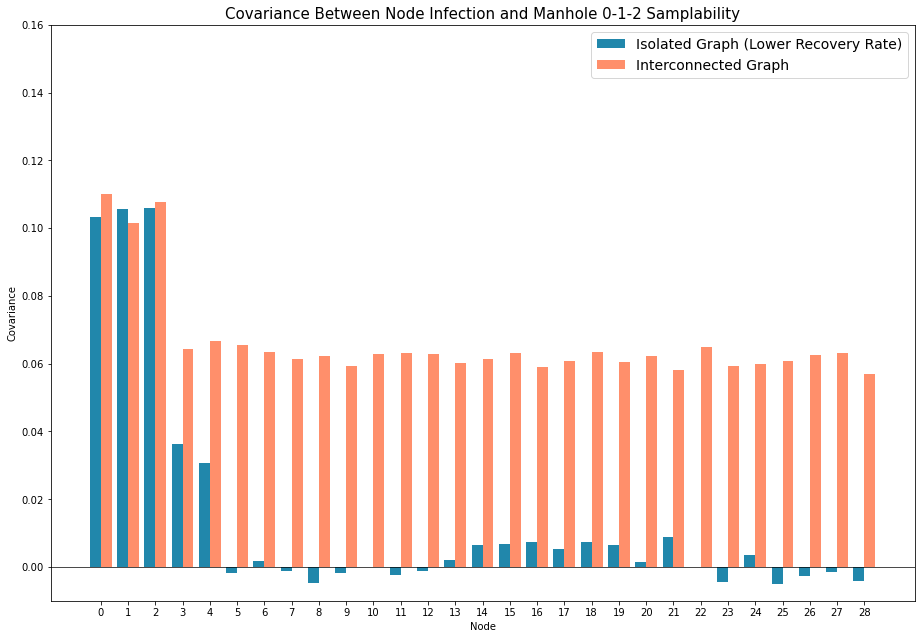

In [38]:
make_graph([covs1, covs2], 
           '#2187ab',
           '#ff8f6b', 
           'Node',
           'Covariance', 
           'Covariance Between Node Infection and Manhole 0-1-2 Samplability',
           ['Isolated Graph (Lower Recovery Rate)', 'Interconnected Graph'],
           y_lim=0.16,
           y_low=-0.01,
           show_zero=True)

In [34]:
raw = pd.read_csv("fork3.csv")
raw2 = pd.read_csv("fork3_intercon_low_inf.csv")
nodes = list(raw)
nodes = nodes[:29]
covs1 = get_covariances(nodes, '0-1-2', raw)
covs2 = get_covariances(nodes, '0-1-2', raw2)

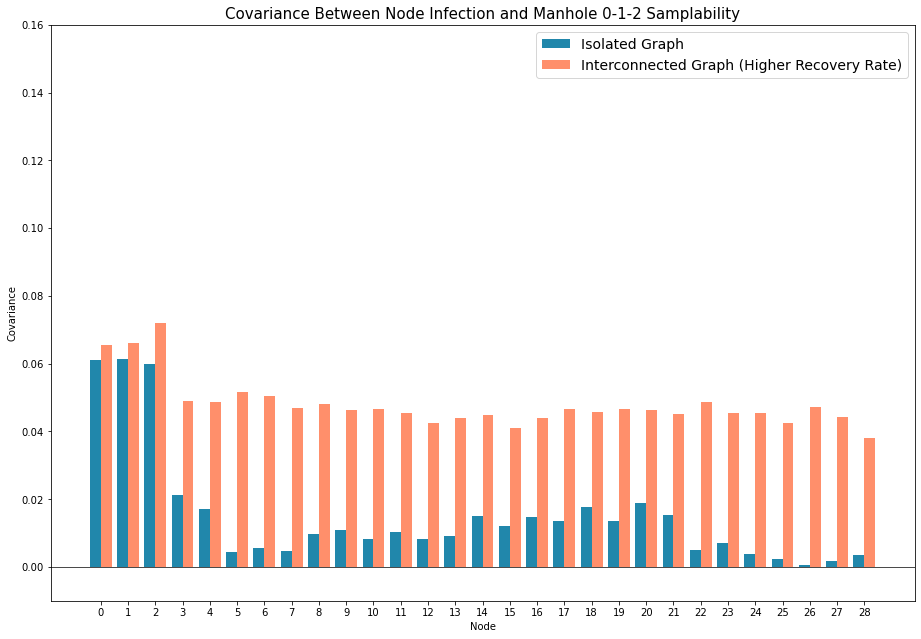

In [35]:
make_graph([covs1, covs2], 
           '#2187ab',
           '#ff8f6b', 
           'Node',
           'Covariance', 
           'Covariance Between Node Infection and Manhole 0-1-2 Samplability',
           ['Isolated Graph', 'Interconnected Graph (Higher Recovery Rate)'],
           y_lim=0.16,
           y_low=-0.01,
           show_zero=True)

In [3]:
raw = pd.read_csv("fork3_pointeight.csv")
raw2 = pd.read_csv("fork3_intercon_zerozerofive.csv")

In [4]:
base = get_base_infected(raw, 28)
stats = get_inf_rates(raw, 28, '0-1-2')
ratio = get_ratio(base, stats, 50000, stats['time'])
base2 = get_base_infected(raw2, 28)
stats2 = get_inf_rates(raw2, 28, '0-1-2')
ratio2 = get_ratio(base2, stats2, 50000, stats2['time'])

In [5]:
one, two, three, four = [], [], [], []
for i in ratio.keys():
    one.append(ratio[i][0])
    two.append(ratio[i][1])
    three.append(ratio2[i][0])
    four.append(ratio2[i][1])

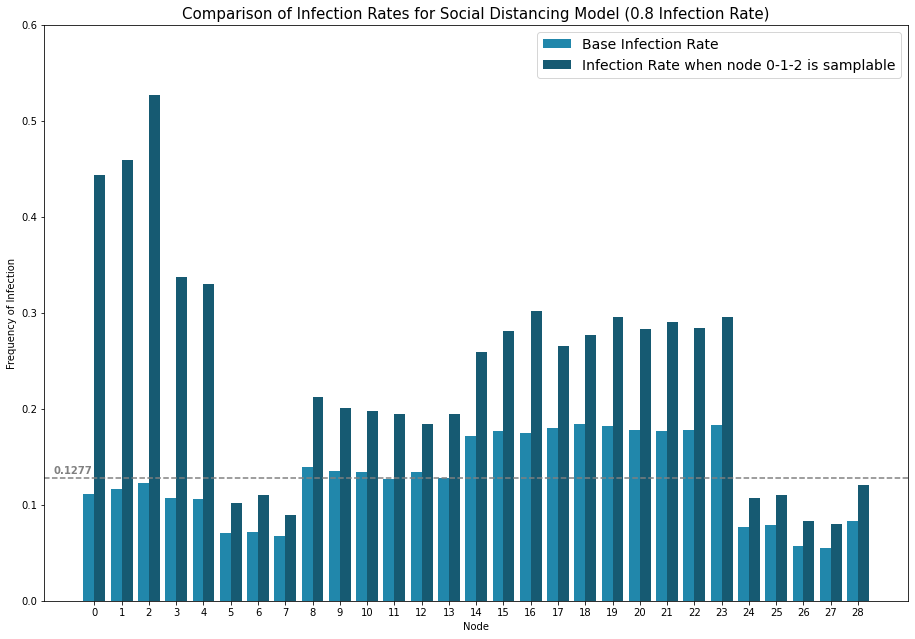

In [6]:
make_graph([one, two], 
           '#2187ab', 
           '#165a72', 
           'Node',
           'Frequency of Infection', 
           'Comparison of Infection Rates for Social Distancing Model (0.8 Infection Rate)',
           ['Base Infection Rate', 'Infection Rate when node 0-1-2 is samplable'],
           y_lim=0.6,
           avg=sum(one)/len(one))

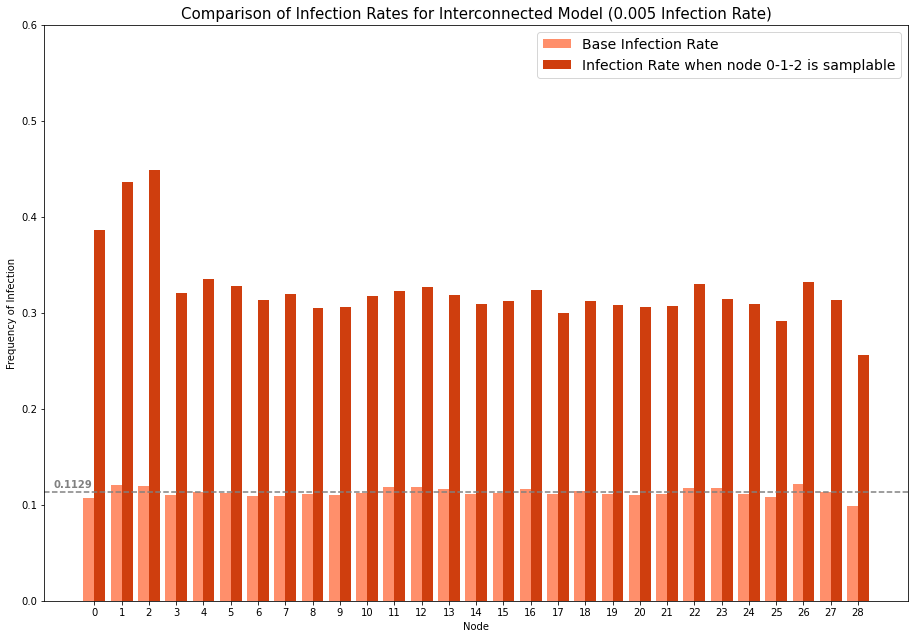

In [8]:
make_graph([three, four], 
           '#ff8f6b',
           '#cf3e0e', 
           'Node',
           'Frequency of Infection', 
           'Comparison of Infection Rates for Interconnected Model (0.005 Infection Rate)',
           ['Base Infection Rate', 'Infection Rate when node 0-1-2 is samplable'],
           avg=sum(three)/len(three))

In [39]:
raw = pd.read_csv("fork3_high_inf.csv")
raw2 = pd.read_csv("fork3_intercon.csv")

In [12]:
base = get_base_infected(raw, 28)
stats = get_inf_rates(raw, 28, '14-15-16-17')
ratio = get_ratio(base, stats, 50000, stats['time'])
base2 = get_base_infected(raw2, 28)
stats2 = get_inf_rates(raw2, 28, '14-15-16-17')
ratio2 = get_ratio(base2, stats2, 50000, stats2['time'])

In [13]:
one, two, three, four = [], [], [], []
for i in ratio.keys():
    one.append(ratio[i][0])
    two.append(ratio[i][1])
    three.append(ratio2[i][0])
    four.append(ratio2[i][1])

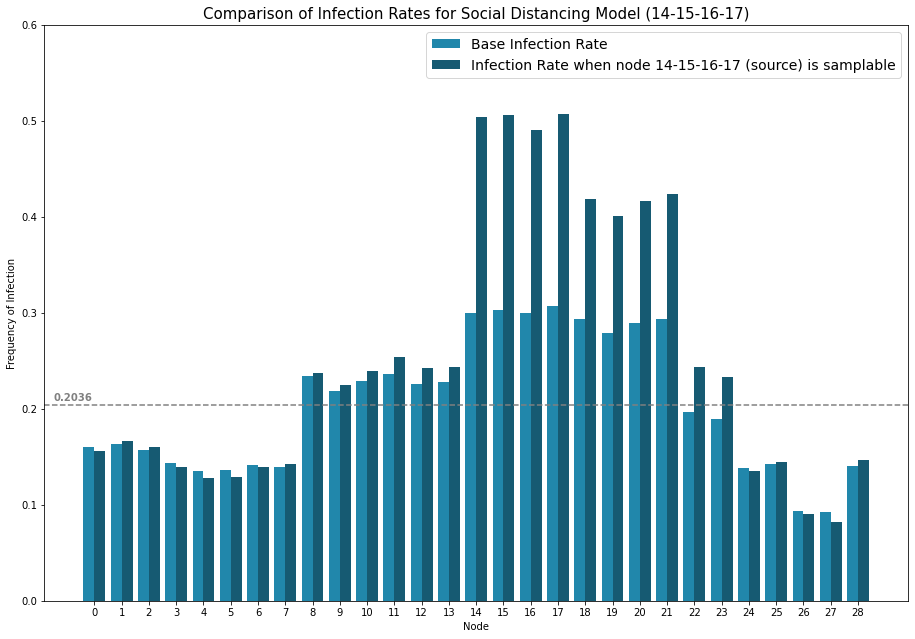

In [14]:
make_graph([one, two], 
           '#2187ab', 
           '#165a72', 
           'Node',
           'Frequency of Infection', 
           'Comparison of Infection Rates for Social Distancing Model (14-15-16-17)',
           ['Base Infection Rate', 'Infection Rate when node 14-15-16-17 (source) is samplable'],
           y_lim=0.6,
           avg=sum(one)/len(one))

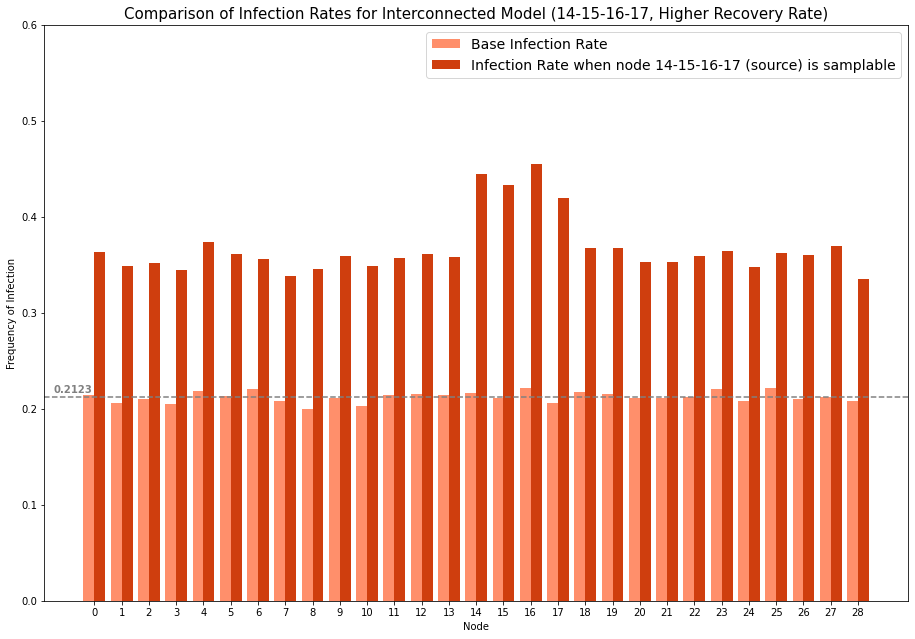

In [19]:
make_graph([three, four], 
           '#ff8f6b',
           '#cf3e0e', 
           'Node',
           'Frequency of Infection', 
           'Comparison of Infection Rates for Interconnected Model (14-15-16-17, Higher Recovery Rate)',
           ['Base Infection Rate', 'Infection Rate when node 14-15-16-17 (source) is samplable'],
           avg=sum(three)/len(three))

In [32]:
nodes = list(raw)
nodes = nodes[:29]
covs1 = get_covariances(nodes, '14-15-16-17', raw)
covs2 = get_covariances(nodes, '14-15-16-17', raw2)

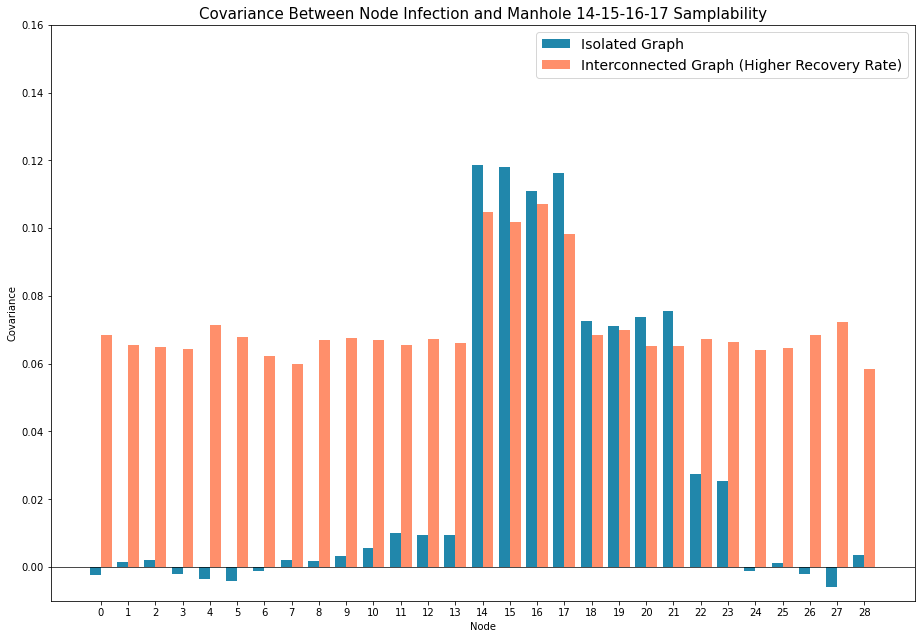

In [33]:
make_graph([covs1, covs2], 
           '#2187ab',
           '#ff8f6b', 
           'Node',
           'Covariance', 
           'Covariance Between Node Infection and Manhole 14-15-16-17 Samplability',
           ['Isolated Graph', 'Interconnected Graph (Higher Recovery Rate)'],
           y_lim=0.16,
           y_low=-0.01,
           show_zero=True)

In [16]:
base = get_base_infected(raw, 28)
stats = get_inf_rates(raw, 28, '4-6-7')
ratio = get_ratio(base, stats, 50000, stats['time'])
base2 = get_base_infected(raw2, 28)
stats2 = get_inf_rates(raw2, 28, '4-6-7')
ratio2 = get_ratio(base2, stats2, 50000, stats2['time'])

In [22]:
one, two, three, four = [], [], [], []
for i in ratio.keys():
    one.append(ratio[i][0])
    two.append(ratio[i][1])
    three.append(ratio2[i][0])
    four.append(ratio2[i][1])

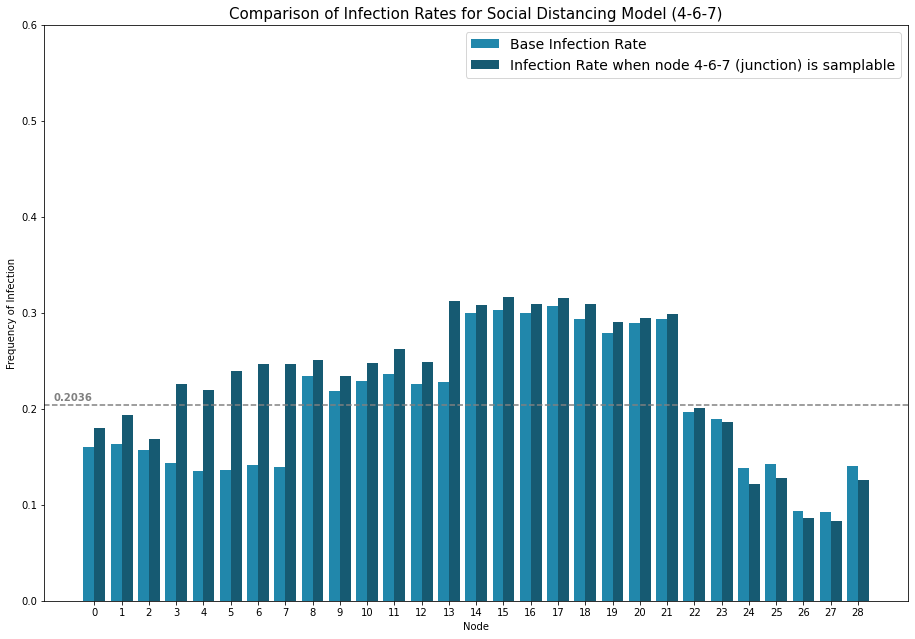

In [23]:
make_graph([one, two], 
           '#2187ab', 
           '#165a72', 
           'Node',
           'Frequency of Infection', 
           'Comparison of Infection Rates for Social Distancing Model (4-6-7)',
           ['Base Infection Rate', 'Infection Rate when node 4-6-7 (junction) is samplable'],
           y_lim=0.6,
           avg=sum(one)/len(one))

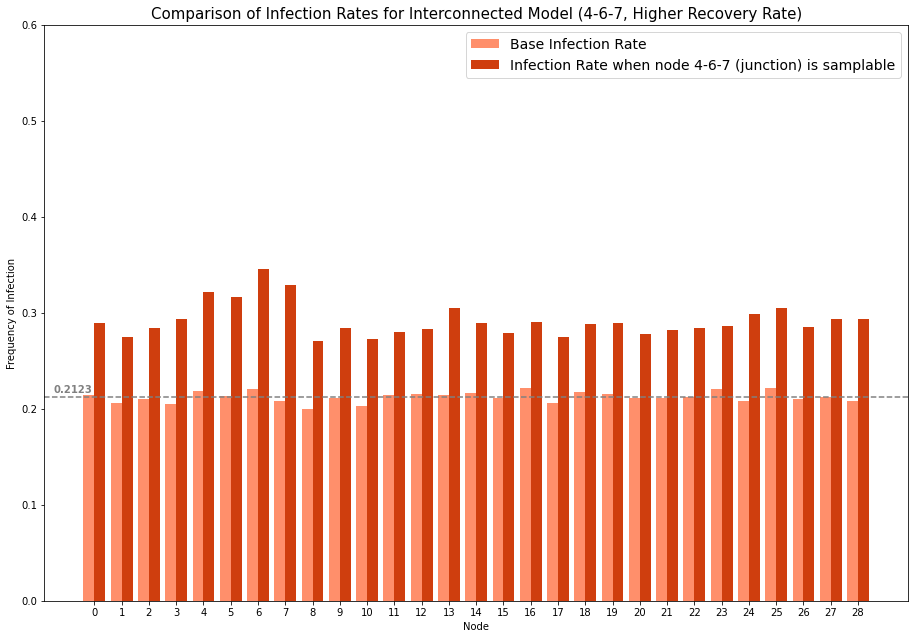

In [24]:
make_graph([three, four], 
           '#ff8f6b',
           '#cf3e0e', 
           'Node',
           'Frequency of Infection', 
           'Comparison of Infection Rates for Interconnected Model (4-6-7, Higher Recovery Rate)',
           ['Base Infection Rate', 'Infection Rate when node 4-6-7 (junction) is samplable'],
           avg=sum(three)/len(three))

In [30]:
nodes = list(raw)
nodes = nodes[:29]
covs1 = get_covariances(nodes, '4-6-7', raw)
covs2 = get_covariances(nodes, '4-6-7', raw2)

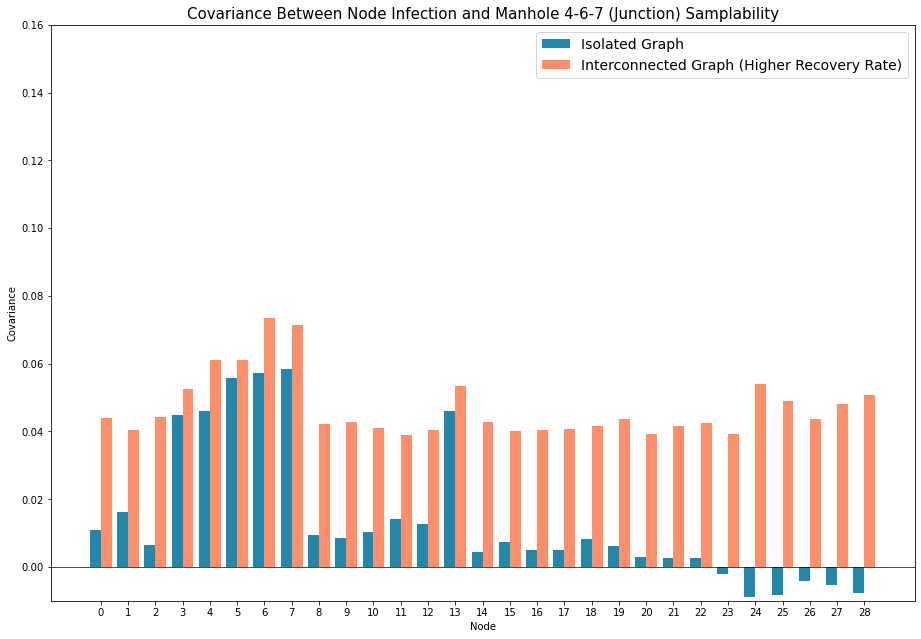

In [31]:
make_graph([covs1, covs2], 
           '#2187ab',
           '#ff8f6b', 
           'Node',
           'Covariance', 
           'Covariance Between Node Infection and Manhole 4-6-7 (Junction) Samplability',
           ['Isolated Graph', 'Interconnected Graph (Higher Recovery Rate)'],
           y_lim=0.16,
           y_low=-0.01,
           show_zero=True)

In [40]:
nodes = list(raw)
nodes = nodes[:29]
covs1 = get_covariances(nodes, '8-9', raw)
covs2 = get_covariances(nodes, '8-9', raw2)

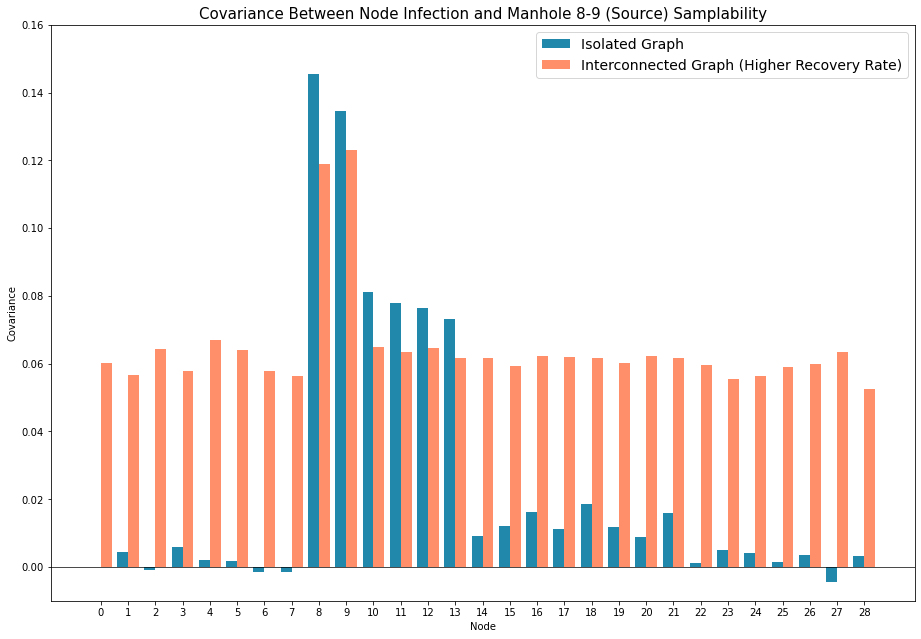

In [41]:
make_graph([covs1, covs2], 
           '#2187ab',
           '#ff8f6b', 
           'Node',
           'Covariance', 
           'Covariance Between Node Infection and Manhole 8-9 (Source) Samplability',
           ['Isolated Graph', 'Interconnected Graph (Higher Recovery Rate)'],
           y_lim=0.16,
           y_low=-0.01,
           show_zero=True)

In [42]:
nodes = list(raw)
nodes = nodes[:29]
covs1 = get_covariances(nodes, '27-28', raw)
covs2 = get_covariances(nodes, '27-28', raw2)

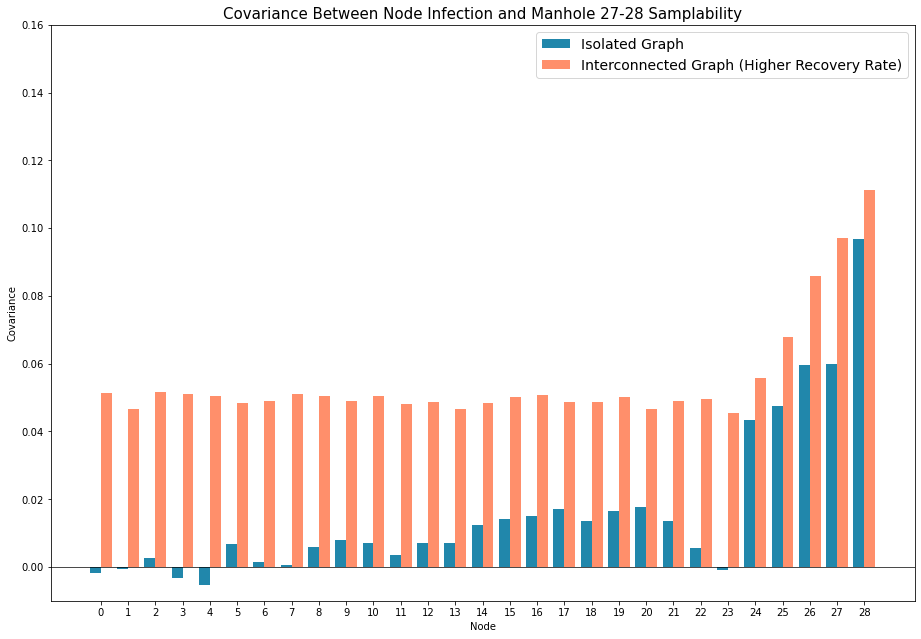

In [43]:
make_graph([covs1, covs2], 
           '#2187ab',
           '#ff8f6b', 
           'Node',
           'Covariance', 
           'Covariance Between Node Infection and Manhole 27-28 Samplability',
           ['Isolated Graph', 'Interconnected Graph (Higher Recovery Rate)'],
           y_lim=0.16,
           y_low=-0.01,
           show_zero=True)

In [44]:
nodes = list(raw)
nodes = nodes[:29]
covs1 = get_covariances(nodes, '23-24', raw)
covs2 = get_covariances(nodes, '23-24', raw2)

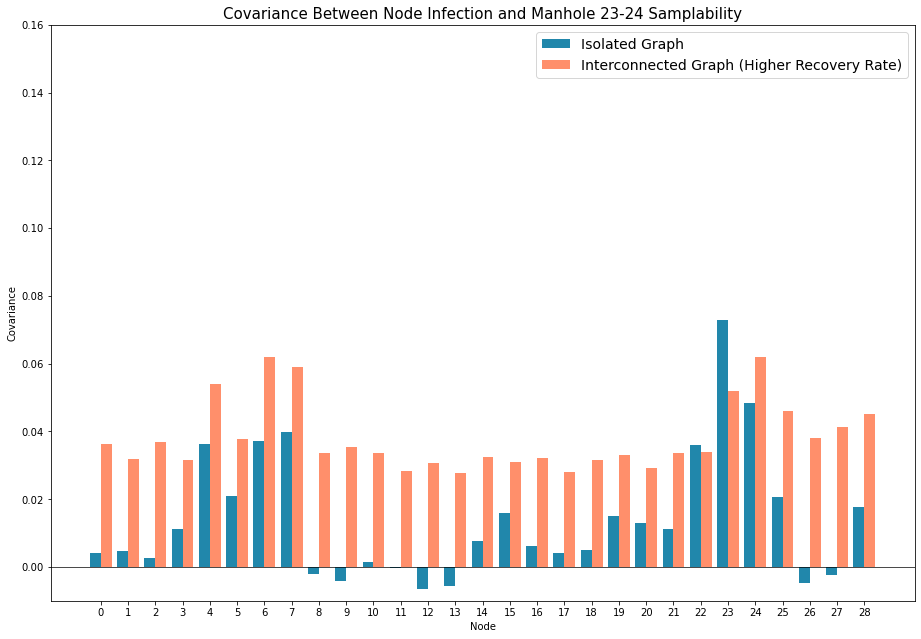

In [45]:
make_graph([covs1, covs2], 
           '#2187ab',
           '#ff8f6b', 
           'Node',
           'Covariance', 
           'Covariance Between Node Infection and Manhole 23-24 Samplability',
           ['Isolated Graph', 'Interconnected Graph (Higher Recovery Rate)'],
           y_lim=0.16,
           y_low=-0.01,
           show_zero=True)

In [46]:
def get_inf_rates_exclude(raw, num_nodes, manhole, exclude):
    nodes = list(raw)
    nodes = nodes[:num_nodes+1]
    
    stats = {}
    stats['time'] = 0
    for i in nodes:
        stats[i] = 0
        
    for i in range(len(raw[manhole])):
        if raw[manhole][i] == 1 and raw[exclude][i] == 0:
            stats['time'] += 1
            for j in nodes:
                if raw[j][i] == 1:
                    stats[j] += 1
                    
    return stats

def get_inf_rates_exclude2(raw, num_nodes, manhole, exclude, exclude2):
    nodes = list(raw)
    nodes = nodes[:num_nodes+1]
    
    stats = {}
    stats['time'] = 0
    for i in nodes:
        stats[i] = 0
        
    for i in range(len(raw[manhole])):
        if raw[manhole][i] == 1 and raw[exclude][i] == 0 and raw[exclude2][i] == 0:
            stats['time'] += 1
            for j in nodes:
                if raw[j][i] == 1:
                    stats[j] += 1
                    
    return stats

In [47]:
base = get_base_infected(raw, 28)
stats = get_inf_rates_exclude2(raw, 28, '4-6-7', '3-5', '13')
ratio = get_ratio(base, stats, 50000, stats['time'])
base2 = get_base_infected(raw2, 28)
stats2 = get_inf_rates_exclude2(raw, 28, '4-6-7', '3-5', '13')
ratio2 = get_ratio(base2, stats2, 50000, stats2['time'])

In [48]:
one, two, three, four = [], [], [], []
for i in ratio.keys():
    one.append(ratio[i][0])
    two.append(ratio[i][1])
    three.append(ratio2[i][0])
    four.append(ratio2[i][1])

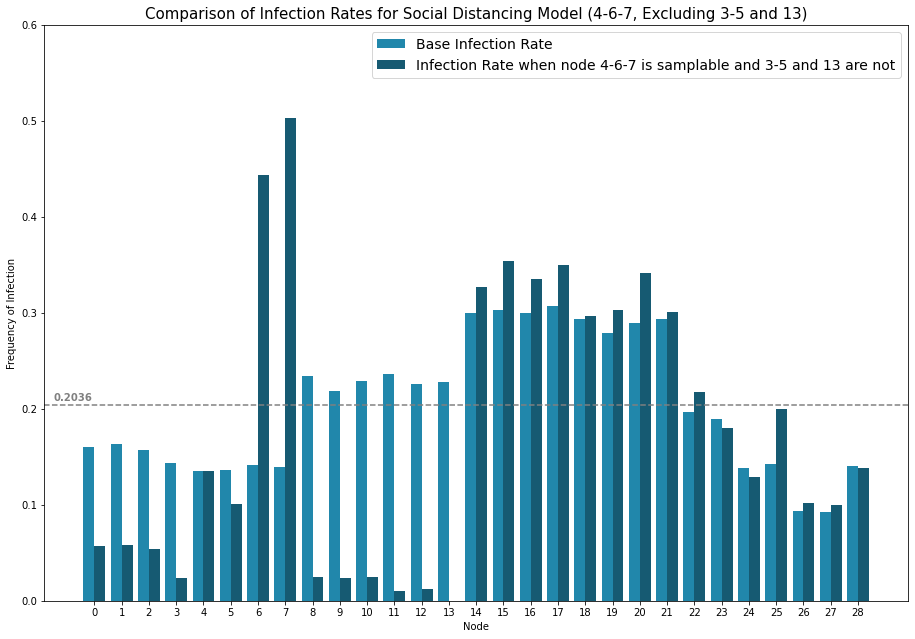

In [50]:
make_graph([one, two], 
           '#2187ab', 
           '#165a72', 
           'Node',
           'Frequency of Infection', 
           'Comparison of Infection Rates for Social Distancing Model (4-6-7, Excluding 3-5 and 13)',
           ['Base Infection Rate', 'Infection Rate when node 4-6-7 is samplable and 3-5 and 13 are not'],
           y_lim=0.6,
           avg=sum(one)/len(one))

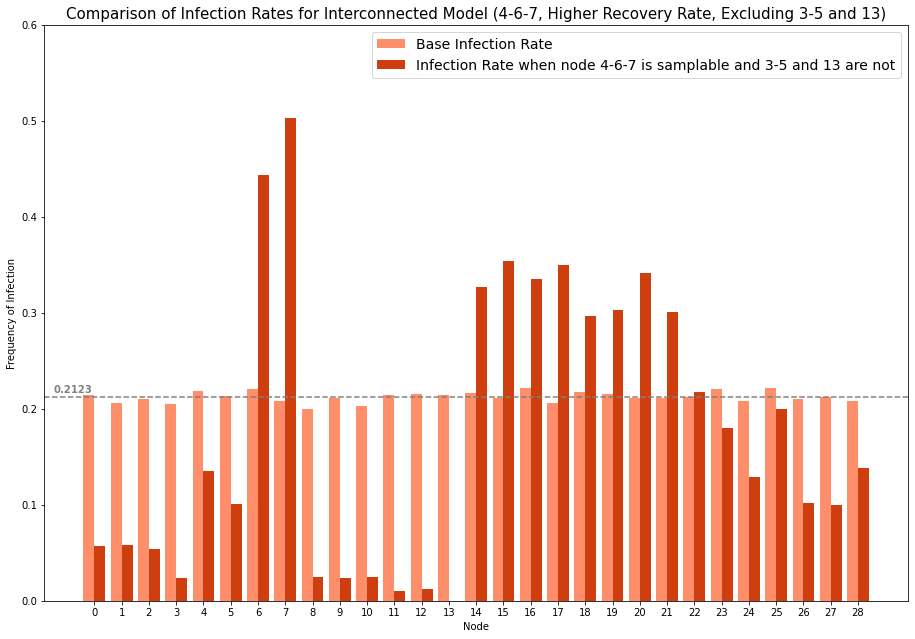

In [51]:
make_graph([three, four], 
           '#ff8f6b',
           '#cf3e0e', 
           'Node',
           'Frequency of Infection', 
           'Comparison of Infection Rates for Interconnected Model (4-6-7, Higher Recovery Rate, Excluding 3-5 and 13)',
           ['Base Infection Rate', 'Infection Rate when node 4-6-7 is samplable and 3-5 and 13 are not'],
           avg=sum(three)/len(three))